# Assignment 3

In this assignment, I am predicting whether firms in the 'Manufacture of computer, electronic and optical products’ industry will default or not in 2015 (based on 2014 data). There are 287, 829 observations in the data (46,412 firms throughout multiple years, from 2005-2016). I start off with the exploratory data analysis and data work, then move on to creating my predictive models and analzing their effectiveness using various classification measures. I then use the best model to predict the number of firms that are likely to default in 2015. I used various x variables that are seen later on, as long as my predictior variable, 'default' that is defined as: a company that existed in 2014 (sales > 0), but did not exist in 2015 (sales were 0 or missing/NA).

Predictive Models:
- Model 1: Logit Regression (many cleaned x variables + interaction terms)
- Model 2: Logit Regression (first 9 x variables)
- Model 3: Logit Regression (first 18 x variables)
- Model 4: Logit Regression (all x variables- not







Model 1: Linear Regression with OLS
Model 2: Linear Regression with LASSO
Model 3: CART (Regression Tree)
Model 4: Random Forest

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error,
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, brier_score_loss, recall_score, confusion_matrix, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data in
data = pd.read_csv('cs_bisnode_panel.zip')
data

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1.001034e+06,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1.001034e+06,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1.001034e+06,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1.001034e+06,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1.001034e+06,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,NaN,0.000000,1807.407349,3.703704,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,NaN,0.000000,1518.518555,96.296295,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,NaN,0.000000,988.888916,77.777779,0.0,0.0,0.0,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,NaN,0.000000,644.444458,233.333328,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


In [3]:
#filtering data for Manufacture of computer, electronic and optical products’ industry (26)
data = data.loc[data['ind2'] == 26]
data
#data for specific industry

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
960,6.538183e+06,2005-01-01,2005-12-31,NaN,792.592590,6237.037109,348.148163,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
961,6.538183e+06,2006-01-01,2006-12-31,NaN,196.296295,6007.407227,451.851837,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
962,6.538183e+06,2007-01-01,2007-12-31,NaN,233.333328,9007.407227,2637.037109,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
963,6.538183e+06,2008-01-01,2008-12-31,NaN,422.222229,7707.407227,1651.851807,0.000000,0.0,0.000000,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
964,6.538183e+06,2009-01-01,2009-12-31,NaN,1525.925903,18196.296875,8714.814453,18.518518,0.0,-18.518518,...,male,Foreign,2630.0,26.0,2.0,2,East,1992-08-25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287439,4.628231e+11,2012-01-01,2012-12-31,NaN,359.259247,21662.962891,19481.482422,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.333333
287440,4.628231e+11,2013-01-01,2013-12-31,NaN,3159.259277,15488.888672,21440.740234,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.298611
287441,4.628231e+11,2014-01-01,2014-12-31,NaN,2581.481445,70059.257812,74911.109375,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.486111
287442,4.628231e+11,2015-01-01,2015-12-31,NaN,2177.777832,46062.964844,49844.445312,0.000000,0.0,0.000000,...,male,Domestic,2630.0,26.0,2.0,1,Central,2009-12-06,NaN,0.562500


In [4]:
#creating y variable ('default')
# generate status_alive; if sales larger than zero and not-NA, then firm is alive
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

# defaults in 1 year if there are sales in this year but no sales one year later
# Status_in_one_year: data.groupby('comp_id')['status_alive'].shift(-1)
data["default"] = (
    (data["status_alive"] == 1)
    & (data.groupby("comp_id")["status_alive"].shift(-1) == 0)
).astype(int)

#setting y equal to 'default'
y = data['default']

## Cleaning Dataset

In [6]:
#x = amort, sales, curr_assets, curr_liab, extra_exp, extra_inc, fixed_assets, inc_bef_tax, intang_assets, inventories
#liq_assets, material_exp, personnel_exp, profit_loss_year, share_eq, subscribed_cap, tang_assets
#ceo_count, foreign_ceo (%), female(%), inoffice_days, *gender(female_only, male_only, mixed_gender),
#*origin(domestic, not_domestic, mix), urban_m (capital city, big_city, other_hq_city), *region_m (Central, East, West)


#imputing missing amort values with median (less affected by outliers)
#creating flag_variable for missing values and imputed values
data.amort.isnull().sum()
data['amort_missing_flag'] = data.amort.isnull().astype(int)
data['amort_imputed_flag'] = data.amort.isnull().astype(int)
data.fillna({'amort':data['amort'].median()}, inplace = True)

#imputing missing curr_assets values with median
#creating flag_variable for missing values and imputed values
data.curr_assets.isnull().sum()
data['curr_assets_missing_flag'] = data.curr_assets.isnull().astype(int)
data['curr_assets_imputed_flag'] = data.curr_assets.isnull().astype(int)
data.fillna({'curr_assets':data['curr_assets'].median()}, inplace = True)

#imputing missing curr_liab values with median
#creating flag_variable for missing values and imputed values
data.curr_liab.isnull().sum()
data['curr_liab_missing_flag'] = data.curr_liab.isnull().astype(int)
data['curr_liab_imputed_flag'] = data.curr_liab.isnull().astype(int)
data.fillna({'curr_liab':data['curr_liab'].median()}, inplace = True)

#imputing missing extra_exp values with median
#creating flag_variable for missing values and imputed values
data.extra_exp.isnull().sum()
data['extra_exp_missing_flag'] = data.extra_exp.isnull().astype(int)
data['extra_exp_imputed_flag'] = data.extra_exp.isnull().astype(int)
data.fillna({'extra_exp':data['extra_exp'].median()}, inplace = True)

#imputing missing extra_inc values with median
#creating flag_variable for missing values and imputed values
data.extra_inc.isnull().sum()
data['extra_inc_missing_flag'] = data.extra_inc.isnull().astype(int)
data['extra_inc_imputed_flag'] = data.extra_inc.isnull().astype(int)
data.fillna({'extra_inc':data['extra_inc'].median()}, inplace = True)

#delete finished_prof column (too many null values): 13054/14877
data = data.drop('finished_prod', axis=1)

#imputing missing fixed_assets values with median
#creating flag_variable for missing values and imputed values
data.fixed_assets.isnull().sum()
data['fixed_assets_missing_flag'] = data.fixed_assets.isnull().astype(int)
data['fixed_assets_imputed_flag'] = data.fixed_assets.isnull().astype(int)
data.fillna({'fixed_assets':data['fixed_assets'].median()}, inplace = True)

#imputing missing inc_bef_tax values with median
#creating flag_variable for missing values and imputed values
data.inc_bef_tax.isnull().sum()
data['inc_bef_tax_missing_flag'] = data.inc_bef_tax.isnull().astype(int)
data['inc_bef_tax_imputed_flag'] = data.inc_bef_tax.isnull().astype(int)
data.fillna({'inc_bef_tax':data['inc_bef_tax'].median()}, inplace = True)

#imputing missing intang_assets values with median
#creating flag_variable for missing values and imputed values
data.intang_assets.isnull().sum()
data['intang_assets_missing_flag'] = data.intang_assets.isnull().astype(int)
data['intang_assets_imputed_flag'] = data.intang_assets.isnull().astype(int)
data.fillna({'intang_assets':data['intang_assets'].median()}, inplace = True)

#imputing missing inventories values with median
#creating flag_variable for missing values and imputed values
data.inventories.isnull().sum()
data['inventories_missing_flag'] = data.inventories.isnull().astype(int)
data['inventories_imputed_flag'] = data.inventories.isnull().astype(int)
data.fillna({'inventories':data['inventories'].median()}, inplace = True)

#imputing missing liq_assets values with median
#creating flag_variable for missing values and imputed values
data.liq_assets.isnull().sum()
data['liq_assets_missing_flag'] = data.liq_assets.isnull().astype(int)
data['liq_assets_imputed_flag'] = data.liq_assets.isnull().astype(int)
data.fillna({'liq_assets':data['liq_assets'].median()}, inplace = True)

#imputing missing material_exp values with median
#creating flag_variable for missing values and imputed values
data.material_exp.isnull().sum()
data['material_exp_missing_flag'] = data.material_exp.isnull().astype(int)
data['material_exp_imputed_flag'] = data.material_exp.isnull().astype(int)
data.fillna({'material_exp':data['material_exp'].median()}, inplace = True)

#delete net_dom_sales column (too many null values): 13022/14877
data = data.drop('net_dom_sales', axis=1)

#delete net_exp_sales column (too many null values): 13022/14877
data = data.drop('net_exp_sales', axis=1)

#imputing missing personnel_exp values with median
#creating flag_variable for missing values and imputed values
data.personnel_exp.isnull().sum()
data['personnel_exp_missing_flag'] = data.personnel_exp.isnull().astype(int)
data['personnel_exp_imputed_flag'] = data.personnel_exp.isnull().astype(int)
data.fillna({'personnel_exp':data['personnel_exp'].median()}, inplace = True)

#imputing missing profit_loss_year values with median
#creating flag_variable for missing values and imputed values
data.profit_loss_year.isnull().sum()
data['profit_loss_year_missing_flag'] = data.profit_loss_year.isnull().astype(int)
data['profit_loss_year_imputed_flag'] = data.profit_loss_year.isnull().astype(int)
data.fillna({'profit_loss_year':data['profit_loss_year'].median()}, inplace = True)

#imputing missing share_eq values with median
#creating flag_variable for missing values and imputed values
data.share_eq.isnull().sum()
data['share_eq_year_missing_flag'] = data.share_eq.isnull().astype(int)
data['share_eq_year_imputed_flag'] = data.share_eq.isnull().astype(int)
data.fillna({'share_eq':data['share_eq'].median()}, inplace = True)

#imputing missing subscribed_cap values with median
#creating flag_variable for missing values and imputed values
data.subscribed_cap.isnull().sum()
data['subscribed_cap_missing_flag'] = data.subscribed_cap.isnull().astype(int)
data['subscribed_cap_imputed_flag'] = data.subscribed_cap.isnull().astype(int)
data.fillna({'subscribed_cap':data['subscribed_cap'].median()}, inplace = True)

#imputing missing tang_assets values with median
#creating flag_variable for missing values and imputed values
data.tang_assets.isnull().sum()
data['tang_assets_missing_flag'] = data.tang_assets.isnull().astype(int)
data['tang_assets_imputed_flag'] = data.tang_assets.isnull().astype(int)
data.fillna({'tang_assets':data['tang_assets'].median()}, inplace = True)

#delete wages column (too many null values): 13060/14877
data = data.drop('wages', axis=1)

#imputing missing ceo_count values with median
#creating flag_variable for missing values and imputed values
data.ceo_count.isnull().sum()
data['ceo_count_missing_flag'] = data.ceo_count.isnull().astype(int)
data['ceo_count_imputed_flag'] = data.ceo_count.isnull().astype(int)
data.fillna({'ceo_count':data['ceo_count'].median()}, inplace = True)

#imputing missing foreign values with median (% of foreign CEOs)
#creating flag_variable for missing values and imputed values
data.rename(columns= {'foreign':'foreign_ceo'}, inplace = True)
data.foreign_ceo.isnull().sum()
data['foreign_ceo_missing_flag'] = data.foreign_ceo.isnull().astype(int)
data['foreign_ceo_imputed_flag'] = data.foreign_ceo.isnull().astype(int)
data.fillna({'foreign_ceo':data['foreign_ceo'].median()}, inplace = True)

#imputing missing female values with median (% of female CEOs)
#creating flag_variable for missing values and imputed values
data.female.isnull().sum()
data['female_missing_flag'] = data.female.isnull().astype(int)
data['female_imputed_flag'] = data.female.isnull().astype(int)
data.fillna({'female':data['female'].median()}, inplace = True)

#imputing missing inoffice_days values with median (could use median or mean in this case as distribution is not skewed- using median for consistency)
#creating flag_variable for missing values and imputed values
data.inoffice_days.isnull().sum()
data['inoffice_days_missing_flag'] = data.inoffice_days.isnull().astype(int)
data['inoffice_days_imputed_flag'] = data.inoffice_days.isnull().astype(int)
data.fillna({'inoffice_days':data['inoffice_days'].median()}, inplace = True)

#impute the nan gender values with mode (categorical variable)
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
#categorical variable gender (female only, male only, or mixed)
data['female_only'] = (data['gender'] == 'female').astype(int)
data['male_only'] = (data['gender'] == 'male').astype(int)
data['mixed_gender'] = (data['gender'] == 'mix').astype(int)

#impute the nan origin values with mode (categorical variable)
data['origin'] = data['origin'].fillna(data['origin'].mode()[0])
#categorical variable origin (domestic, not_domestic, mix)
data['domestic'] = (data['origin'] == 'Domestic').astype(int)
data['not_domestic'] = (data['origin'] == 'foreign').astype(int)
data['mix'] = (data['origin'] == 'mix').astype(int)

#impute the nan urban_m values with mode (categorical variable)
data['urban_m'] = data['urban_m'].fillna(data['urban_m'].mode()[0])
#categorical variable urban_m (1- capital city, 2-other big city, 3-other)
data['capital_city'] = (data['urban_m'] == 1).astype(int)
data['big_city'] = (data['urban_m'] == 2).astype(int)
data['other_hq_city'] = (data['urban_m'] == 3).astype(int)

#impute the nan region_m values with mode (categorical variable)
data['region_m'] = data['region_m'].fillna(data['region_m'].mode()[0])
#categorical variable region_m (Central, East, West)
data['central'] = (data['region_m'] == 'Central').astype(int)
data['east'] = (data['region_m'] == 'East').astype(int)
data['west'] = (data['region_m'] == 'West').astype(int)

In [7]:
variables = ['amort', 'sales', 'curr_assets', 'curr_liab', 'extra_exp', 'extra_inc', 'fixed_assets', 'inc_bef_tax', 
             'intang_assets', 'inventories','liq_assets', 'material_exp', 'personnel_exp', 'profit_loss_year',
             'share_eq', 'subscribed_cap', 'tang_assets', 'ceo_count', 'foreign_ceo', 'female', 
             'inoffice_days', 'female_only', 'male_only', 'domestic', 'not_domestic', 'capital_city','other_hq_city',
             'east', 'west']
#reference group for gender is mixed_gender firms
#refrence group for origin is mix CEO origin
#reference group for urban_m is big_city HQ location
#reference group for region_m is Central HQ region

In [8]:
len(data.columns)

98

### Creating holdout and training samples

In [9]:
#criteria for the holdout sample so I can mask the training sample with !holdout_criteria
holdout_criteria = (data['year'] == 2014) & ((data['sales'] >=1000) & (data['sales']<=10000000))

In [10]:
#holdout sample creation
holdout = data[holdout_criteria]
print(f'Holdout shape: {holdout.shape}')
holdout.head()

Holdout shape: (1037, 98)


,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,mixed_gender,domestic,not_domestic,mix,capital_city,big_city,other_hq_city,central,east,west
969,6538183.0,2014-01-01,2014-12-31,NaN,1018.518494,17022.222656,3040.740723,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
1128,8416055.0,2014-01-01,2014-12-31,NaN,425.925934,105740.742188,6918.518555,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
1467,12428378.0,2014-01-01,2014-12-31,NaN,0.000000,0.000000,9277.777344,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,0
1706,17776540.0,2014-01-01,2014-12-31,NaN,48.148148,142296.296875,164237.031250,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
1735,18626760.0,2014-01-01,2014-12-31,NaN,5755.555664,95185.187500,45766.667969,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1


In [11]:
holdout.default.value_counts()
#no matter what I do I get 26 companies defaulted...so, sticking with 26 firms defaulted for now

default
0    1011
1      26
Name: count, dtype: int64

In [12]:
#creating training sample
training = data[~holdout_criteria]
training = training.loc[training['year'] != 2016]
print(f'Training shape: {training.shape}')
training.head()

Training shape: (13252, 98)


,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,mixed_gender,domestic,not_domestic,mix,capital_city,big_city,other_hq_city,central,east,west
960,6538183.0,2005-01-01,2005-12-31,NaN,792.592590,6237.037109,348.148163,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
961,6538183.0,2006-01-01,2006-12-31,NaN,196.296295,6007.407227,451.851837,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
962,6538183.0,2007-01-01,2007-12-31,NaN,233.333328,9007.407227,2637.037109,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
963,6538183.0,2008-01-01,2008-12-31,NaN,422.222229,7707.407227,1651.851807,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,1,0
964,6538183.0,2009-01-01,2009-12-31,NaN,1525.925903,18196.296875,8714.814453,18.518518,0.0,-18.518518,...,0,0,0,0,0,1,0,0,1,0


In [13]:
#Logit regression won't accept null values in sales, so imputing to 0
#imputing missing sales values with 0
#creating flag_variable for missing values and imputed values
training.sales.isnull().sum()
training['sales_missing_flag'] = training.sales.isnull().astype(int)
training['sales_imputed_flag'] = training.sales.isnull().astype(int)
training['sales'].fillna(0, inplace=True)

## Model 1: Simple Linear Logistic Regression (Logit)

In [14]:
##interactions

training['interaction_curr_assets_vs_curr_liab'] = training['curr_assets'] * training['curr_liab']
training['interaction_inoffice_days_vs_foreign_ceo'] = training['inoffice_days'] * training['foreign_ceo']
training['interaction_tang_vs_liq_assets'] = training['tang_assets'] * training['liq_assets']
training['interaction_female_vs_male'] = training['female_only']  * training['male_only']
training['interaction_foreign_ceo_vs_ceo_count'] = training['foreign_ceo']  * training['ceo_count']
training['interaction_capital_city_vs_not_domestic'] = training['capital_city']  * training['not_domestic']
training['interaction_profit_loss_year_vs_extra_exp'] = training['profit_loss_year']  * training['extra_exp']


interaction_terms = ['interaction_curr_assets_vs_curr_liab', 'interaction_inoffice_days_vs_foreign_ceo', 'interaction_tang_vs_liq_assets', 'interaction_female_vs_male', 'interaction_foreign_ceo_vs_ceo_count', 'interaction_capital_city_vs_not_domestic', 'interaction_profit_loss_year_vs_extra_exp']

In [15]:
#variables for variables and interactions
basevars = training[variables]
base_interactions = training[interaction_terms]
X1 = pd.concat([basevars, base_interactions], axis=1)

In [16]:
#had to change scale for X1 because otherwise the coefficients were 0
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)


In [17]:
#training sample outcome variable
y = training['default']

In [18]:
#function to get mse, rmse
def rmse_scorer(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

In [19]:
#cross-validating model 

logistic_model = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model.fit(X1_scaled, y)

LogisticRegressionCV(cv=5)

In [20]:
#logit coefficient table if wanted
logistic_coefficients = logistic_model.coef_[0]
variable_names = X1.columns

In [21]:
#could get table showing coefficients for each variable
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': logistic_coefficients})
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

In [22]:
#calculate cv rmse
cv_rmse1 = cross_val_score(logistic_model, X1_scaled, y, cv=5, scoring=make_scorer(rmse_scorer))
print("Cross-Validated RMSE:", np.mean(cv_rmse1))

Cross-Validated RMSE: 0.16434982323141417


In [23]:
#prediction measures
y_pred = logistic_model.predict(X1_scaled)
print("Classification Report:\n", classification_report(y, y_pred))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model.predict_proba(X1_scaled)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     12898
           1       0.00      0.00      0.00       354

    accuracy                           0.97     13252
   macro avg       0.49      0.50      0.49     13252
weighted avg       0.95      0.97      0.96     13252

AUC-ROC Score: 0.6060340454833361


In [24]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model.scores_)


Cross-Validated Scores:
 {1: array([[0.97321765, 0.97321765, 0.97284044, 0.97284044, 0.97284044,
        0.97246322, 0.97208601, 0.97208601, 0.97133157, 0.97170879],
       [0.97321765, 0.97321765, 0.97321765, 0.97321765, 0.97321765,
        0.97246322, 0.97246322, 0.97246322, 0.97246322, 0.97246322],
       [0.97358491, 0.97358491, 0.97358491, 0.97358491, 0.97358491,
        0.97396226, 0.97320755, 0.97283019, 0.97245283, 0.97245283],
       [0.97320755, 0.97320755, 0.97320755, 0.97169811, 0.97169811,
        0.97169811, 0.97207547, 0.97283019, 0.97169811, 0.97169811],
       [0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755,
        0.97320755, 0.97320755, 0.97283019, 0.97283019, 0.97283019]])}


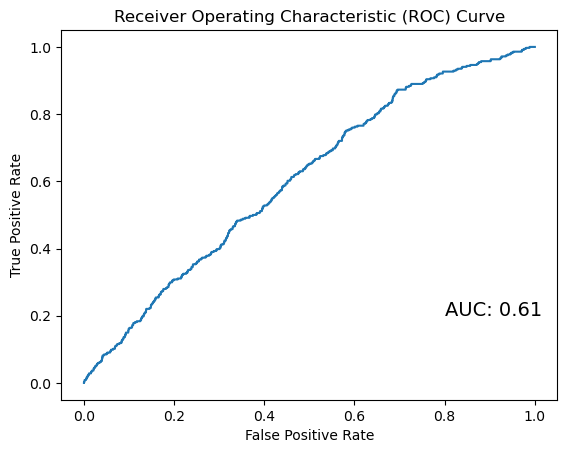

Optimal Threshold: 0.026666474175300173


In [25]:
#visualizing the ROC/AUC
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba(X1_scaled)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal Threshold:", optimal_threshold)



## Model 2- Best Logit Regression

In [26]:
#variables for model 2
X2 = training[variables[:9]]

In [27]:
#cross-validating model 
logistic_model2 = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model2.fit(X2, y)

LogisticRegressionCV(cv=5)

In [28]:
#calculate cv rmse
cv_rmse2 = cross_val_score(logistic_model2, X2, y, cv=5, scoring=make_scorer(rmse_scorer))
print("Cross-Validated RMSE:", np.mean(cv_rmse2))

Cross-Validated RMSE: 0.25843480973064314


In [29]:
#measures for prediction 
y_pred2= logistic_model2.predict(X2)
print("Classification Report:\n", classification_report(y, y_pred2))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model2.predict_proba(X2)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     12898
           1       0.06      0.11      0.08       354

    accuracy                           0.93     13252
   macro avg       0.52      0.53      0.52     13252
weighted avg       0.95      0.93      0.94     13252

AUC-ROC Score: 0.6971154814875166


In [30]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model2.scores_)


Cross-Validated Scores:
 {1: array([[0.90380988, 0.90380988, 0.90380988, 0.90380988, 0.90380988,
        0.90380988, 0.90380988, 0.90380988, 0.90380988, 0.90380988],
       [0.9275745 , 0.9275745 , 0.9275745 , 0.9275745 , 0.9275745 ,
        0.9275745 , 0.9275745 , 0.9275745 , 0.9275745 , 0.9275745 ],
       [0.95056604, 0.95056604, 0.95056604, 0.95056604, 0.95056604,
        0.95056604, 0.95056604, 0.95056604, 0.95056604, 0.95056604],
       [0.94792453, 0.94792453, 0.94792453, 0.94792453, 0.94792453,
        0.94792453, 0.94792453, 0.94792453, 0.94792453, 0.94792453],
       [0.92981132, 0.92981132, 0.92981132, 0.92981132, 0.92981132,
        0.92981132, 0.92981132, 0.92981132, 0.92981132, 0.92981132]])}


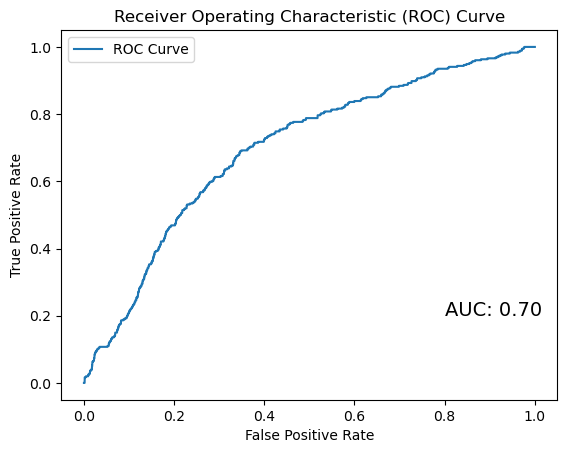

Optimal Threshold: 0.45


In [31]:
#visualizing ROC/AUC
fpr, tpr, thresholds = roc_curve(y, logistic_model2.predict_proba(X2)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold2= thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold: {optimal_threshold2:.2f}")

## Model 3 (Logit)

In [32]:
#variables for model 3
X3 = training[variables[:18]]

In [33]:
#cross-validating model 
logistic_model3 = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model3.fit(X3, y)

LogisticRegressionCV(cv=5)

In [34]:
#calculate cv rmse
cv_rmse3 = cross_val_score(logistic_model3, X3, y, cv=5, scoring=make_scorer(rmse_scorer))
print("Cross-Validated RMSE:", np.mean(cv_rmse3))

Cross-Validated RMSE: 0.25844276195843613


In [35]:
#measures for model 3 prediction
y_pred3= logistic_model3.predict(X3)
print("Classification Report:\n", classification_report(y, y_pred3))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model3.predict_proba(X3)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     12898
           1       0.05      0.10      0.07       354

    accuracy                           0.93     13252
   macro avg       0.51      0.52      0.52     13252
weighted avg       0.95      0.93      0.94     13252

AUC-ROC Score: 0.6730691396117122


In [36]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model3.scores_)


Cross-Validated Scores:
 {1: array([[0.90607318, 0.92380234, 0.9275745 , 0.92606564, 0.92644285,
        0.92493399, 0.92606564, 0.92606564, 0.92304791, 0.92417955],
       [0.91663523, 0.92380234, 0.92003018, 0.91927575, 0.91776688,
        0.91776688, 0.91776688, 0.9181441 , 0.91738966, 0.91738966],
       [0.95169811, 0.94943396, 0.9490566 , 0.94264151, 0.95018868,
        0.95132075, 0.95056604, 0.95056604, 0.9509434 , 0.95056604],
       [0.92679245, 0.92754717, 0.9354717 , 0.92830189, 0.93584906,
        0.93471698, 0.93433962, 0.93471698, 0.93471698, 0.93471698],
       [0.95169811, 0.95132075, 0.94943396, 0.94943396, 0.9490566 ,
        0.9490566 , 0.9490566 , 0.94867925, 0.94867925, 0.94867925]])}


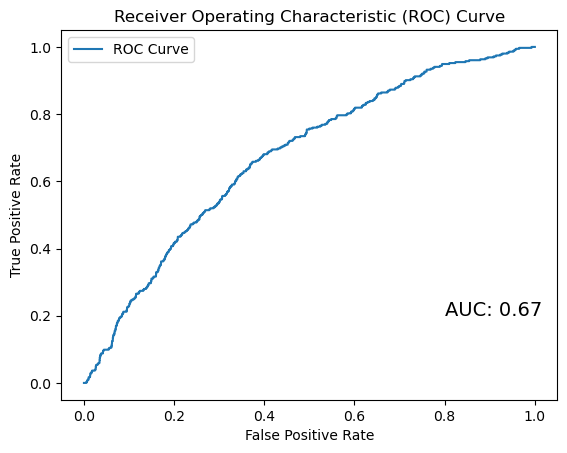

Optimal Threshold: 0.40


In [37]:
#visualizing ROC/AUC
fpr, tpr, thresholds = roc_curve(y, logistic_model3.predict_proba(X3)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold3 = thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold: {optimal_threshold3:.2f}")

## Model 4 (Logit)

In [38]:
#variables for model 4
X4 = training[variables]

In [39]:
#cross-validating model 
logistic_model4 = LogisticRegressionCV(cv=5, penalty='l2')
logistic_model4.fit(X4, y)

LogisticRegressionCV(cv=5)

In [40]:
#calculate cv rmse
cv_rmse4 = cross_val_score(logistic_model4, X4, y, cv=5, scoring=make_scorer(rmse_scorer))
print("Cross-Validated RMSE:", np.mean(cv_rmse4))

Cross-Validated RMSE: 0.16572794321722245


In [41]:
#measures for model 4 prediction
y_pred4= logistic_model4.predict(X4)
print("Classification Report:\n", classification_report(y, y_pred4))
print("AUC-ROC Score:", roc_auc_score(y, logistic_model4.predict_proba(X4)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     12898
           1       0.20      0.01      0.01       354

    accuracy                           0.97     13252
   macro avg       0.59      0.50      0.50     13252
weighted avg       0.95      0.97      0.96     13252

AUC-ROC Score: 0.6004421479964923


In [42]:
#accuracy scores
print("Cross-Validated Scores:\n", logistic_model4.scores_)


Cross-Validated Scores:
 {1: array([[0.97057714, 0.97133157, 0.97246322, 0.97208601, 0.97133157,
        0.97246322, 0.97095436, 0.97170879, 0.97095436, 0.97208601],
       [0.97133157, 0.97284044, 0.97208601, 0.97246322, 0.97208601,
        0.97246322, 0.97208601, 0.97246322, 0.97170879, 0.97246322],
       [0.97320755, 0.97207547, 0.97245283, 0.97320755, 0.97320755,
        0.97320755, 0.97320755, 0.97320755, 0.97320755, 0.97320755],
       [0.97245283, 0.97283019, 0.97283019, 0.97207547, 0.97245283,
        0.97283019, 0.97245283, 0.97245283, 0.97245283, 0.97245283],
       [0.96943396, 0.97056604, 0.97245283, 0.96792453, 0.97283019,
        0.96566038, 0.97207547, 0.97132075, 0.97245283, 0.97283019]])}


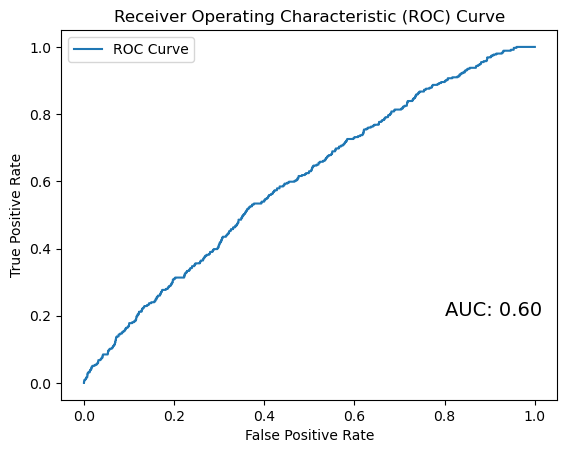

Optimal Threshold: 0.07


In [43]:
#visualizing ROC/AUC
fpr, tpr, thresholds = roc_curve(y, logistic_model4.predict_proba(X4)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold4 = thresholds[np.argmax(tpr - fpr)]
print(f"Optimal Threshold: {optimal_threshold4:.2f}")

## Model 5- LASSO Logit Regression (using X1 (all variables and interactions))

In [44]:
#scaling the X1 variables and interactions
scaler = StandardScaler()
X_lasso_scaled = scaler.fit_transform(X1)


In [45]:
#takes a bit of time...
#creating CV  (LASSO penalty)
lasso_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')
lasso_model.fit(X_lasso_scaled, y)


LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')

In [46]:
#changed penalization to 0.1 because it was too high (selected features returned no features)
lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lasso_model.fit(X_lasso_scaled, y)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [47]:
#selected features chosen by LASSO
selected_features = X1.columns[lasso_model.coef_[0] != 0]
print("Selected Features:", selected_features)
#15 selected_features/interactions

Selected Features: Index(['curr_liab', 'extra_exp', 'inventories', 'share_eq', 'subscribed_cap',
       'tang_assets', 'ceo_count', 'foreign_ceo', 'inoffice_days',
       'female_only', 'male_only', 'east', 'west',
       'interaction_inoffice_days_vs_foreign_ceo',
       'interaction_profit_loss_year_vs_extra_exp'],
      dtype='object')


In [48]:
#using selected features selected by lasso
lasso_selected_features = ['curr_liab', 'extra_exp', 'inventories', 'share_eq', 'subscribed_cap',
       'tang_assets', 'ceo_count', 'foreign_ceo', 'inoffice_days',
       'female_only', 'male_only', 'east', 'west',
       'interaction_inoffice_days_vs_foreign_ceo',
       'interaction_profit_loss_year_vs_extra_exp']

X6 = training[lasso_selected_features]

In [49]:
#fitting logit regression model using selected features
lasso_model = lasso_model.fit(X6, y)

In [50]:
#calculate cv rmse
cv_rmse5 = cross_val_score(lasso_model, X6, y, cv=5, scoring=make_scorer(rmse_scorer))
print("Cross-Validated RMSE:", np.mean(cv_rmse5))

Cross-Validated RMSE: 0.1652716637268688


In [51]:
#getting measurements from lasso prediction
y_pred6= lasso_model.predict(X6)
print("Classification Report:\n", classification_report(y, y_pred6))
print("AUC-ROC Score:", roc_auc_score(y, lasso_model.predict_proba(X6)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     12898
           1       1.00      0.00      0.01       354

    accuracy                           0.97     13252
   macro avg       0.99      0.50      0.50     13252
weighted avg       0.97      0.97      0.96     13252

AUC-ROC Score: 0.6283798434128534


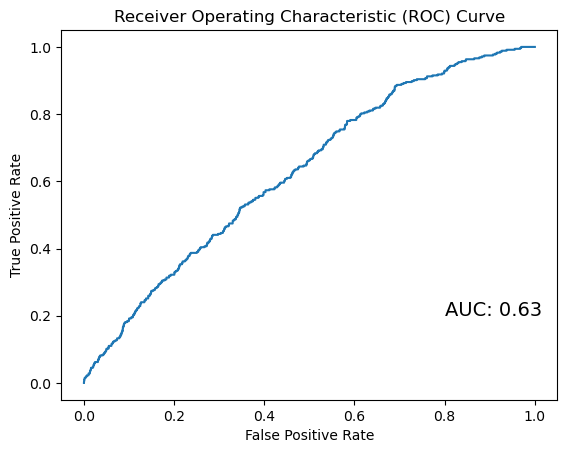

Optimal Threshold: 0.02555382509788696


In [52]:
#visualizing ROC/AUC
fpr, tpr, thresholds = roc_curve(y, lasso_model.predict_proba(X6)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr,tpr):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold5 = thresholds[np.argmax(tpr - fpr)]
print("Optimal Threshold:", optimal_threshold5)

# Model 6- Random Forest

Cross-Validated RMSE: 0.16458732576911483
Accuracy Score: 0.969445492267069
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2570
           1       0.00      0.00      0.00        81

    accuracy                           0.97      2651
   macro avg       0.48      0.50      0.49      2651
weighted avg       0.94      0.97      0.95      2651

AUC-ROC Score: 0.8449824662535428


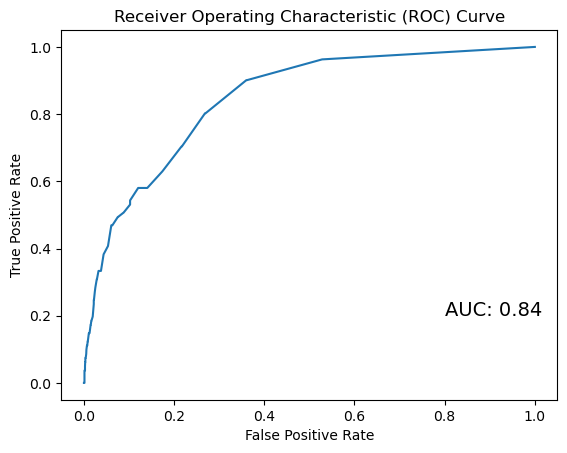

Optimal Threshold: 0.02


In [53]:
#scaling X3 (gives best RF AUC)
X_rf_scaled = scaler.fit_transform(X3)

#data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf_scaled, y, test_size=0.2, random_state=42)

#rf classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

#fitting model on training data
random_forest_model.fit(X_train, y_train)

#making predictions on test set
y_pred_rf = random_forest_model.predict(X_test)

#cv rmse
cv_rmse6 = cross_val_score(random_forest_model, X_rf_scaled, y, cv=5, scoring=make_scorer(rmse_scorer))
print("Cross-Validated RMSE:", np.mean(cv_rmse6))

#evaluate model
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1]))

#visualizing ROC/AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
#also display AUC: 
plt.text(0.8, 0.2, f'AUC: {auc(fpr_rf,tpr_rf):.2f}', fontsize=14)
plt.show()

#optimal threshold
optimal_threshold_rf= thresholds_rf[np.argmax(tpr_rf - fpr_rf)]
print(f"Optimal Threshold: {optimal_threshold_rf:.2f}")

## Model Comparison

In [54]:
#getting expected losses for each model

#defining a loss function (would be from 0 to 1), 0 being the best
def zero_one_loss(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

#predicted probabilities for each model
y_prob = logistic_model.predict_proba(X1_scaled)[:, 1]
y_prob2 = logistic_model2.predict_proba(X2)[:, 1]
y_prob3 = logistic_model3.predict_proba(X3)[:, 1]
y_prob4 = logistic_model4.predict_proba(X4)[:, 1]
y_prob5 = lasso_model.predict_proba(X6)[:, 1]
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]



#using each model's optimal threshold to get binary predictions
y_pred = (y_prob >= optimal_threshold).astype(int)
y_pred2 = (y_prob2 >= optimal_threshold2).astype(int)
y_pred3 = (y_prob3 >= optimal_threshold3).astype(int)
y_pred4 = (y_prob4 >= optimal_threshold4).astype(int)
y_pred5 = (y_prob5 >= optimal_threshold5).astype(int)
y_pred_rf = (y_prob_rf >= optimal_threshold_rf).astype(int)

#getting expected loss for each model 
loss = zero_one_loss(y, y_pred)
loss2 = zero_one_loss(y, y_pred2)
loss3 = zero_one_loss(y, y_pred3)
loss4 = zero_one_loss(y, y_pred4)
loss5 = zero_one_loss(y, y_pred5)
loss_rf = zero_one_loss(y_test, y_pred_rf)


print(f"Model 1 Logit Expected Loss: {loss:.4f}")
print(f"Model 2 Logit Expected Loss: {loss2:.4f}")
print(f"Model 3 Logit Expected Loss: {loss3:.4f}")
print(f"Model 4 Logit Expected Loss: {loss4:.4f}")
print(f"Model 5 LASSO Expected Loss: {loss5:.4f}")
print(f"Model 6 Random Forest Expected Loss: {loss_rf:.4f}")

#best expected loss is Model 6 (Random Forest)

Model 1 Logit Expected Loss: 0.6804
Model 2 Logit Expected Loss: 0.3451
Model 3 Logit Expected Loss: 0.3729
Model 4 Logit Expected Loss: 0.3759
Model 5 LASSO Expected Loss: 0.5738
Model 6 Random Forest Expected Loss: 0.3523


In [55]:
#df to compare the models
pd.DataFrame({
    'Models': ['M1', 'M2', 'M3', 'M4', 'LASSO', 'RF'],
    '# of Predictors': [len(X1.columns), len(X2.columns), len(X3.columns), len(X4.columns), len(lasso_selected_features), len(X3.columns)],
    'CV RMSE': [np.mean(cv_rmse1), np.mean(cv_rmse2), np.mean(cv_rmse3), np.mean(cv_rmse4), np.mean(cv_rmse5), np.mean(cv_rmse6)], 
    'CV AUC': [0.602, 0.696, 0.679, 0.599, 0.626, 0.844],
    'Optimal Threshold': [optimal_threshold, optimal_threshold2, optimal_threshold3, optimal_threshold4, optimal_threshold5, optimal_threshold_rf], 
    'CV Expected Loss': [loss, loss2, loss3, loss4, loss5, loss_rf]
})
#The RF model has the best CV AUC (0.844), but M2 has the best CV expected loss (0.345); however RF's expected loss is close!!
#M4 has the worst CV AUC (0.599), but M1 has the worst cv expected loss (0.680)

,Models,# of Predictors,CV RMSE,CV AUC,Optimal Threshold,CV Expected Loss
0,M1,36,0.164350,0.602,0.026666,0.680350
1,M2,9,0.258435,0.696,0.449890,0.345080
2,M3,18,0.258443,0.679,0.404174,0.372925
3,M4,29,0.165728,0.599,0.066641,0.375868
4,LASSO,15,0.165272,0.626,0.025554,0.573800
5,RF,18,0.164587,0.844,0.020000,0.352320


## Using Best Model (RF) to predict the holdout sample

In [56]:
#holdout X and y variables
X_holdout = holdout[X3.columns]
y_holdout = holdout['default']

In [72]:
#scale x
X_holdout_scaled = scaler.transform(X_holdout)

#predicting holdout set
y_prob_rf_holdout = random_forest_model.predict_proba(X_holdout_scaled)[:, 1]

#optimal threshold
fpr_rf_holdout, tpr_rf_holdout, thresholds_rf_holdout = roc_curve(y_holdout, y_prob_rf_holdout)
roc_auc_rf_holdout = roc_auc_score(y_holdout, y_prob_rf_holdout)

optimal_threshold_rf_holdout = thresholds_rf_holdout[np.argmax(tpr_rf_holdout - fpr_rf_holdout)]

#binary predictions using optimal threshold
y_pred_rf_holdout = (y_prob_rf_holdout >= optimal_threshold_rf_holdout).astype(int)

#new colummn for those predicted to default
holdout['predicted_default'] = y_pred_rf_holdout

In [73]:
#num of companies predicted to default
num_predicted_default = y_pred_rf_holdout.sum()

print(f"Number of companies predicted to default: {num_predicted_default}")
#At first said 161 firms, then reran and it changed to 276 firms predicted to default???

Number of companies predicted to default: 276


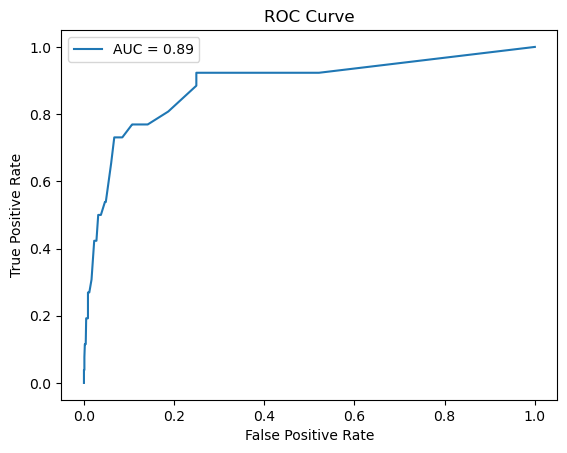

Optimal Threshold: 0.02333333333333333


In [74]:
#want to see the ROC curve and the AUC for this prediction!!!
fpr, tpr, thresholds = roc_curve(y_holdout, y_prob_rf_holdout)

# Calculate AUC-ROC to assess overall performance
roc_auc = roc_auc_score(y_holdout, y_prob_rf_holdout)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Find the optimal threshold based on your criteria
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(f'Optimal Threshold: {optimal_threshold}')


### More metrics used to predict the holdout sample

Brier Score (RF): 0.0211
AUC (RF): 0.8861
Optimal Threshold (RF): 0.0233
Accuracy (RF): 0.7551
Sensitivity (RF): 0.9231
Specificity (RF): 0.7507
Expected Loss (RF): 0.7580

Descriptive Statistics for the entire holdout set:
Number of Firms: 1037
Number of Defaulted Firms: 276
Number of Firms that Stayed Alive: 761
Mean Sales: 490202.2179
Min Sales: 1070.3704
Max Sales: 9576485.0000


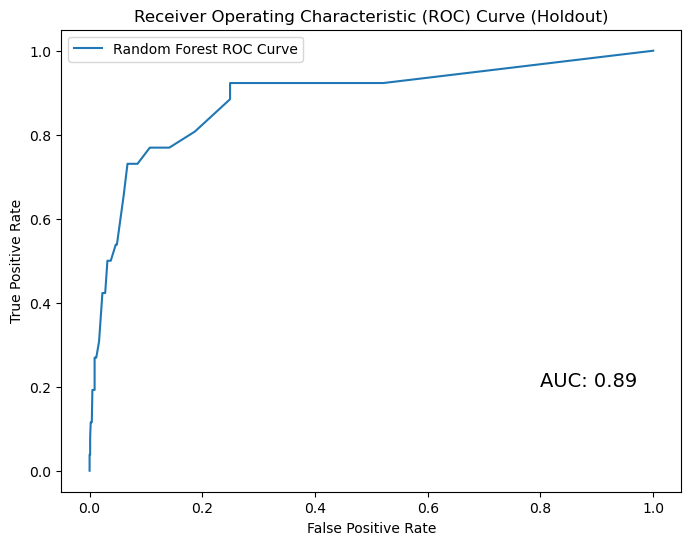

In [75]:
#brier score
brier_score_rf = brier_score_loss(y_holdout, y_prob_rf_holdout)

#ROC/AUC
fpr_rf_holdout, tpr_rf_holdout, thresholds_rf_holdout = roc_curve(y_holdout, y_prob_rf_holdout)
roc_auc_rf_holdout = roc_auc_score(y_holdout, y_prob_rf_holdout)

#optimal threshold for holdout
optimal_threshold_rf_holdout = thresholds_rf_holdout[np.argmax(tpr_rf_holdout - fpr_rf_holdout)]

#binary predictions using optimal threshold
y_pred_rf_holdout = (y_prob_rf_holdout >= optimal_threshold_rf_holdout).astype(int)

#accuracy, sensitivity
accuracy_rf_holdout = accuracy_score(y_holdout, y_pred_rf_holdout)
sensitivity_rf_holdout = recall_score(y_holdout, y_pred_rf_holdout)

#specificity
tn_rf_holdout, fp_rf_holdout, fn_rf_holdout, tp_rf_holdout = confusion_matrix(y_holdout, y_pred_rf_holdout).ravel()
specificity_rf_holdout = tn_rf_holdout / (tn_rf_holdout + fp_rf_holdout)

#expected loss (weighted based on FN and FP)
loss_fn = 15  # Loss for False Negatives
loss_fp = 3   # Loss for False Positives
expected_loss_rf_holdout = (fn_rf_holdout * loss_fn + fp_rf_holdout * loss_fp) / len(y_holdout)

#descriptive stats for holdout set
num_firms_rf_holdout = len(y_holdout)
num_defaulted_rf_holdout = sum(y_pred_rf_holdout)
num_stayed_alive_rf_holdout = num_firms_rf_holdout - num_defaulted_rf_holdout
mean_sales_rf_holdout = X_holdout['sales'].mean()
min_sales_rf_holdout = X_holdout['sales'].min()
max_sales_rf_holdout = X_holdout['sales'].max()

#holdout set metrics
print(f"Brier Score (RF): {brier_score_rf:.4f}")
print(f"AUC (RF): {roc_auc_rf_holdout:.4f}")
print(f"Optimal Threshold (RF): {optimal_threshold_rf_holdout:.4f}")
print(f"Accuracy (RF): {accuracy_rf_holdout:.4f}")
print(f"Sensitivity (RF): {sensitivity_rf_holdout:.4f}")
print(f"Specificity (RF): {specificity_rf_holdout:.4f}")
print(f"Expected Loss (RF): {expected_loss_rf_holdout:.4f}")

print("\nDescriptive Statistics for the entire holdout set:")
print(f"Number of Firms: {num_firms_rf_holdout}")
print(f"Number of Defaulted Firms: {num_defaulted_rf_holdout}")
print(f"Number of Firms that Stayed Alive: {num_stayed_alive_rf_holdout}")
print(f"Mean Sales: {mean_sales_rf_holdout:.4f}")
print(f"Min Sales: {min_sales_rf_holdout:.4f}")
print(f"Max Sales: {max_sales_rf_holdout:.4f}")

#ROC/AUC again
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_holdout, tpr_rf_holdout, label='Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Holdout)')
plt.legend()
# also display AUC:
plt.text(0.8, 0.2, f'AUC: {auc(fpr_rf_holdout, tpr_rf_holdout):.2f}', fontsize=14)
plt.show()
